# Final Project Code #

**Here we will have all the code related to the completion of the final project**

In [26]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
# data (as pandas dataframes) 
Features = cdc_diabetes_health_indicators.data.features 
Target = cdc_diabetes_health_indicators.data.targets 

# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [21]:
#Lets look at the proportion of the Target variable
print(Target.describe())

       Diabetes_binary
count    253680.000000
mean          0.139333
std           0.346294
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000


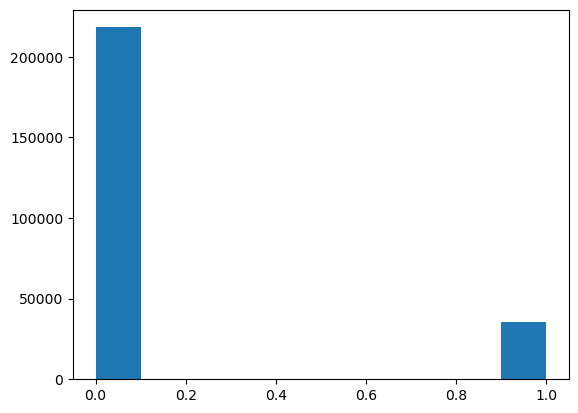

In [25]:
plt.hist(Target)
plt.show()

In [ ]:
pivot_table = pd.pivot_table(
    df,
    values=['Sales', 'Profit'],  # Columns to aggregate
    index='Region',             # Rows (grouping by Region)
    columns='Product',          # Columns (grouping by Product)
    aggfunc='sum',              # Aggregation function (sum in this case)
    fill_value=0                # Fill missing v
)


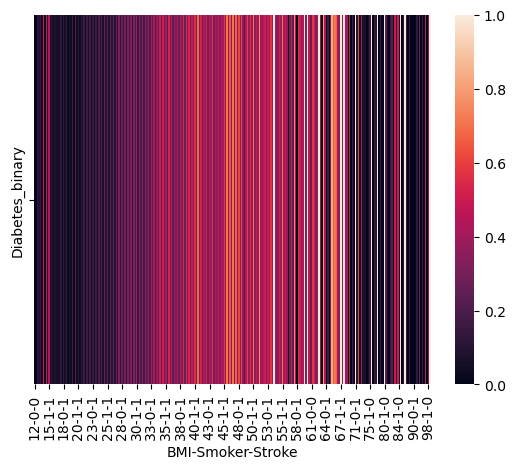

In [49]:
test=cdc_diabetes_health_indicators.data.original
testNew = pd.pivot_table(
    test,
    values=['Diabetes_binary'],
    columns=['BMI','Smoker','Stroke']
)
sns.heatmap(testNew)
plt.show()